# Week 9 - Multivariate Analysis, part 2 

# 1. Lesson - no lesson this week 

# 2. Weekly graph question 

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

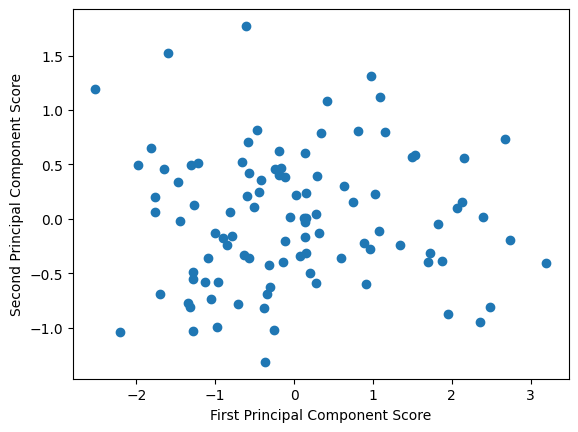

In [16]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score") 

### Three outliers in the upper left corner of the graph:

The outliers in the upper left have a low first principal component score because they’re on the left side of the plot (negative x-axis values).

These same points have a high second principal component score because they’re high on the y-axis (positive values).

Their first principal component score is low and their second principal component score is high.

### What it means about their values in series_1, series_2, and series_3:

### For series_3: 

The outliers probably have higher values in series_3 because the second principal component mainly captures changes in that series. Since those points are high on the second PC axis, it suggests their series_3 values are above average.

### For series_1 and series_2: 

It’s harder to say exactly what’s happening with series_1 and series_2 because they’re very closely related and tend to go up and down together. The first principal component mostly measures how big both of them are combined. The outliers have low scores on the first PC, which suggests their combined values for series_1 and series_2 are lower than usual, but we can’t tell which one is lower individually.

### Comparing series_1 and series_2: 

We can’t really tell from this plot alone whether series_1 is higher or lower than series_2 for those outliers, because PCA blends their variation together into new axes. The two series are so correlated that it’s hard to separate them without going back to look at the original data.

It’s hard to separate series_1 and series_2 in the PCA plot because they’re very strongly related. PCA turns the original data into new axes that capture overall patterns, so it mixes information from both series together instead of keeping them separate. That makes it difficult to tell how series_1 and series_2 compare to each other for individual points, especially the outliers.

### How series_1 and series_2 are related, according to how they were created: 

series_2 was created by multiplying series_1 by a number that’s close to one but has some random noise. So they’re basically the same shape, just with a little variation. That’s why they’re highly correlated and usually go up and down together.








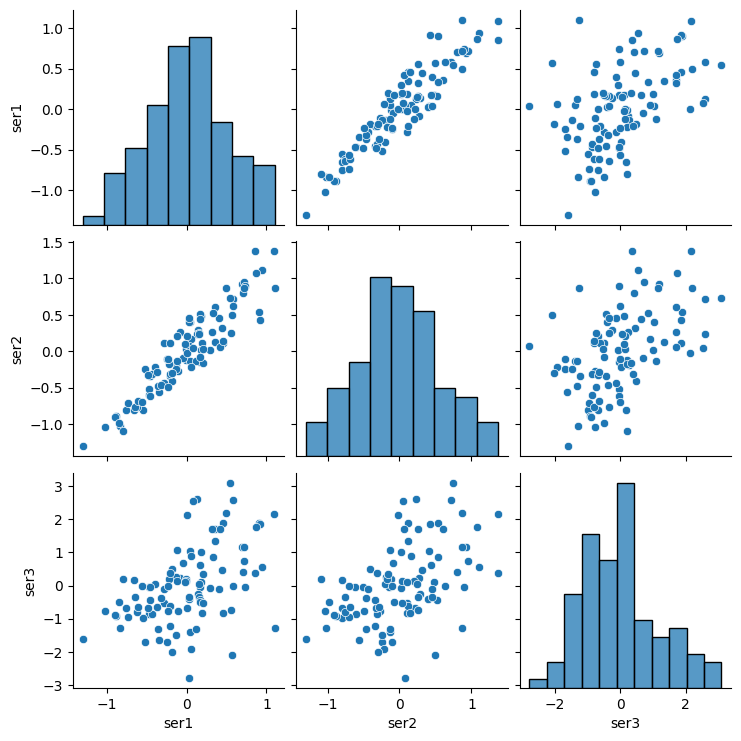

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show() 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers?(Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [18]:
import pandas as pd

df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

print(df.shape)
df.head() 

(70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


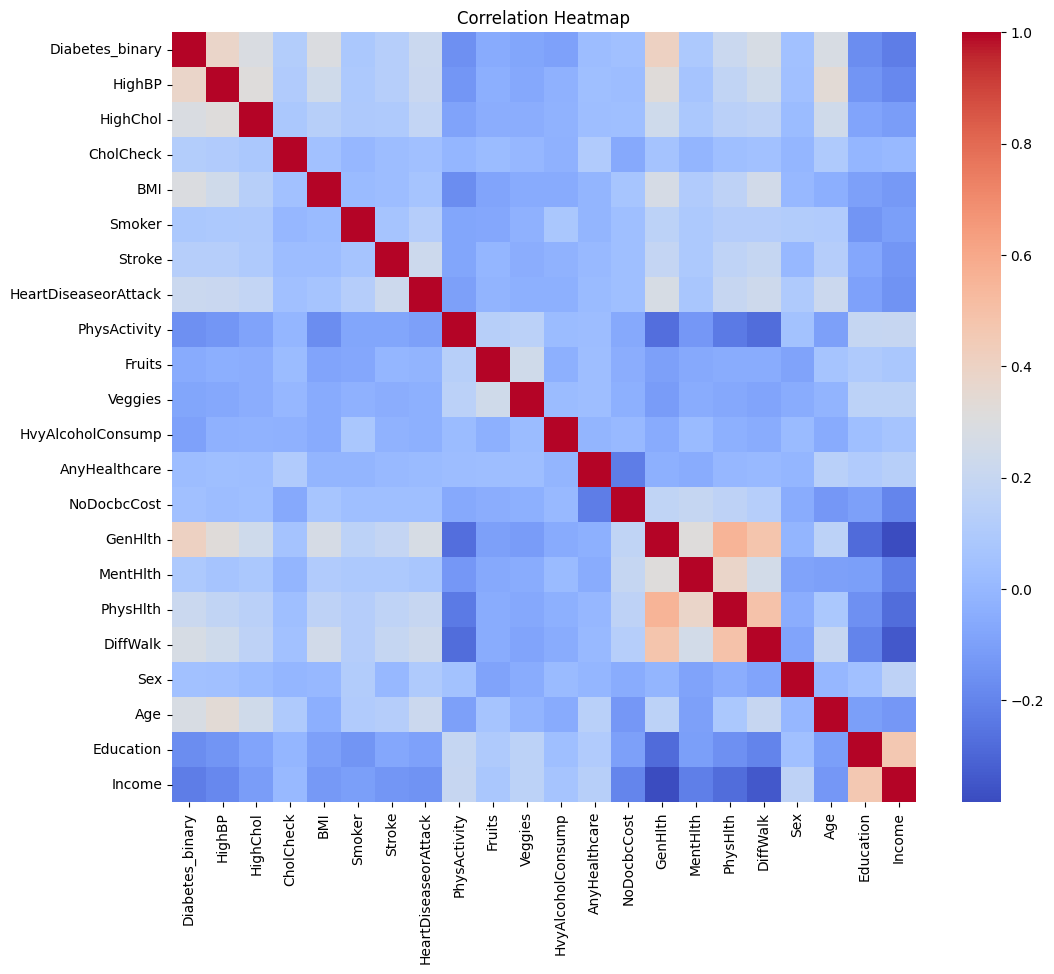

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show() 

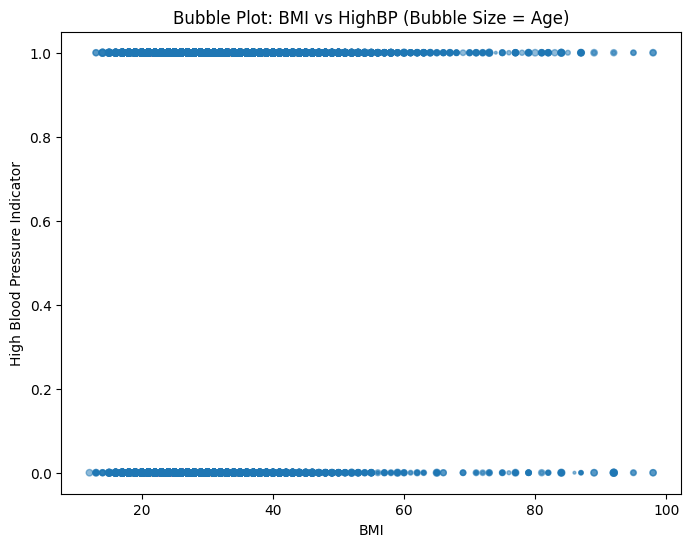

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["BMI"], 
    df["HighBP"], 
    s=df["Age"] * 2,   # bubble size
    alpha=0.5
)
plt.xlabel("BMI")
plt.ylabel("High Blood Pressure Indicator")
plt.title("Bubble Plot: BMI vs HighBP (Bubble Size = Age)")
plt.show() 

Explained Variance Ratio: [0.17757688 0.0820032  0.06073183 0.05520657 0.05410346 0.05096877
 0.04679942 0.04276153 0.04241056 0.03958435 0.03726111 0.03605515
 0.03380319 0.03347256 0.03210843 0.03200211 0.02948895 0.02773305
 0.02483162 0.02253007 0.02112955 0.01743766]


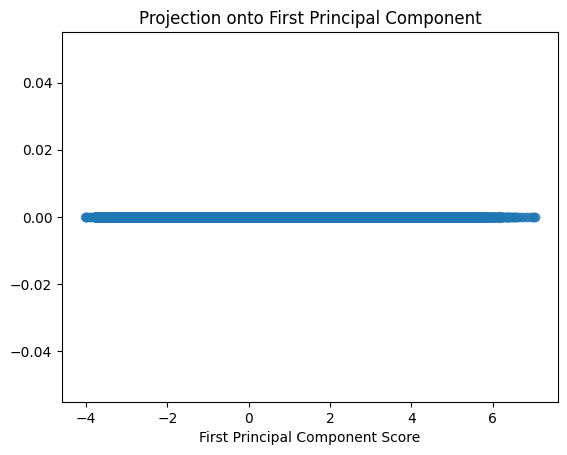

Variance captured by first principal component: 0.17757688159020135


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numeric_df = df.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
pca = PCA()
pca.fit(scaled_data)
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var) 
first_pc_scores = pca.transform(scaled_data)[:, 0]
plt.scatter(first_pc_scores, [0]*len(first_pc_scores), alpha=0.5)
plt.title("Projection onto First Principal Component")
plt.xlabel("First Principal Component Score")
plt.show() 

print("Variance captured by first principal component:",
      explained_var[0]) 

In [22]:
import pandas as pd

f = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

print(df.shape)
print(df.head())
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

print("RMSE:", rmse)
print("R^2 score:", r2_score(y_test, predictions)) 

target = "BMI"
X_bmi = df.drop(columns=[target])
y_bmi = df[target] 

(70692, 22)
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  

### The most useful feaures:

BMI, Age, and HighBP.

BMI is useful for predicting blood pressure, cholesterol, or diabetes.

Age also seems like a useful predictor because it influences many health indicators, like Stroke, HeartDiseaseorAttack, and PhysActivity.

HighBP often predicts HighChol, HeartDiseaseorAttack, and Stroke.

### Conclusions

The data appear consistent with expected health patterns, showing logical correlations among variables like BMI, blood pressure, and cholesterol. There are no significant issues that make the dataset unusable. Overall, the data seem suitable for further analysis and modeling, and there’s no need to seek a new dataset at this time.

### Outliers

BMI has some very high values, which could mean extreme obesity or data errors. Age also has a few higher values that are less common but still reasonable. Physical Activity and General Health show some extreme values too. These outliers might affect our models. 

### Principal Component Analysis

PCA shows we could use fewer dimensions. The first one or two principal components explain a lot of the variance, so we might simplify the data without losing much important information.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

### Super-categories bar chart reproduction

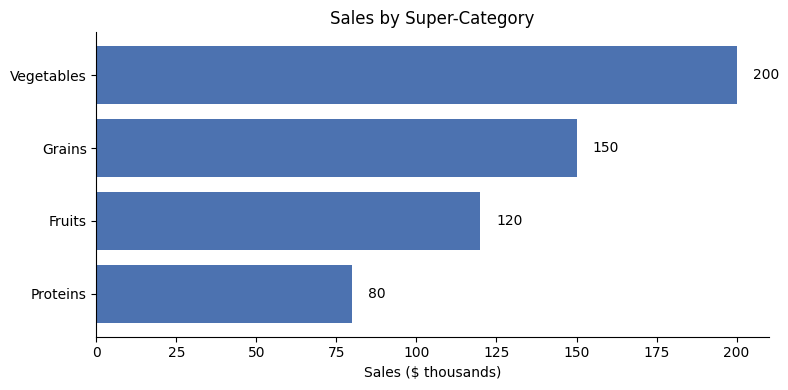

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({
    "Super-Category": ["Fruits", "Vegetables", "Grains", "Proteins"],
    "Sales": [120, 200, 150, 80]
})
data = data.sort_values("Sales", ascending=True) 
fig, ax = plt.subplots(figsize=(8, 4))

bars = ax.barh(
    data["Super-Category"], 
    data["Sales"], 
    color="#4C72B0"
)
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 5, 
        bar.get_y() + bar.get_height()/2, 
        f"{int(width)}", 
        va='center'
    )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel("Sales ($ thousands)")
ax.set_title("Sales by Super-Category")

plt.tight_layout()
plt.show() 